In [ ]:
# データ可視化のためのライブラリをインストール
!pip install sweetviz -q

     |████████████████████████████████| 15.1 MB 13.2 MB/s 


In [ ]:
# 各種ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import sweetviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## データのダウンロードと前処理

In [ ]:
!pip3 install kaggle

In [ ]:
!kaggle datasets list -s insurance

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets list -s insurance --sort-by updated

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets files mirichoi0218/insurance   

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import os
current_dir=os.getcwd()
current_dir

'/content'

In [ ]:
os.listdir(current_dir)

['.config', 'drive', 'sample_data']

In [ ]:
!kaggle datasets download mirichoi0218/insurance   

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
ls

drive/  sample_data/


In [ ]:
!unzip -n insurance.zip 

unzip:  cannot find or open insurance.zip, insurance.zip.zip or insurance.zip.ZIP.


In [ ]:
# テストデータの先頭 20 行を表示
!head insurance.csv -n 20

head: cannot open 'insurance.csv' for reading: No such file or directory


In [ ]:
##insurance.csvの文字を値に修正したものをそれぞれ insurance2.csvとして保存
# sex
# female:1,male:0
# smoker
# yes:0,no:1
# region
# southwest:0
# southeast:1
# northwest:2
# northeast:3 

In [ ]:
cd main

[Errno 2] No such file or directory: 'main'
/content


## データの確認

In [ ]:
# データを試しに読み込み
df = pd.read_csv('/content/drive/MyDrive/0310/insurance2.csv')

In [ ]:
# 先頭 5 件を表示
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [ ]:
# 欠損値を確認
# 「na」があるはずなのに，欠損として認識されていない
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 設定を変えて学習データを再度読み込み
df = pd.read_csv('/content/drive/MyDrive/0310/insurance2.csv',
                       na_values='na') # 欠損値として認識させる値を指定

In [ ]:
#代表値の確認
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [ ]:
# 欠損値を確認
# 次は欠損値が正しく表示された
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

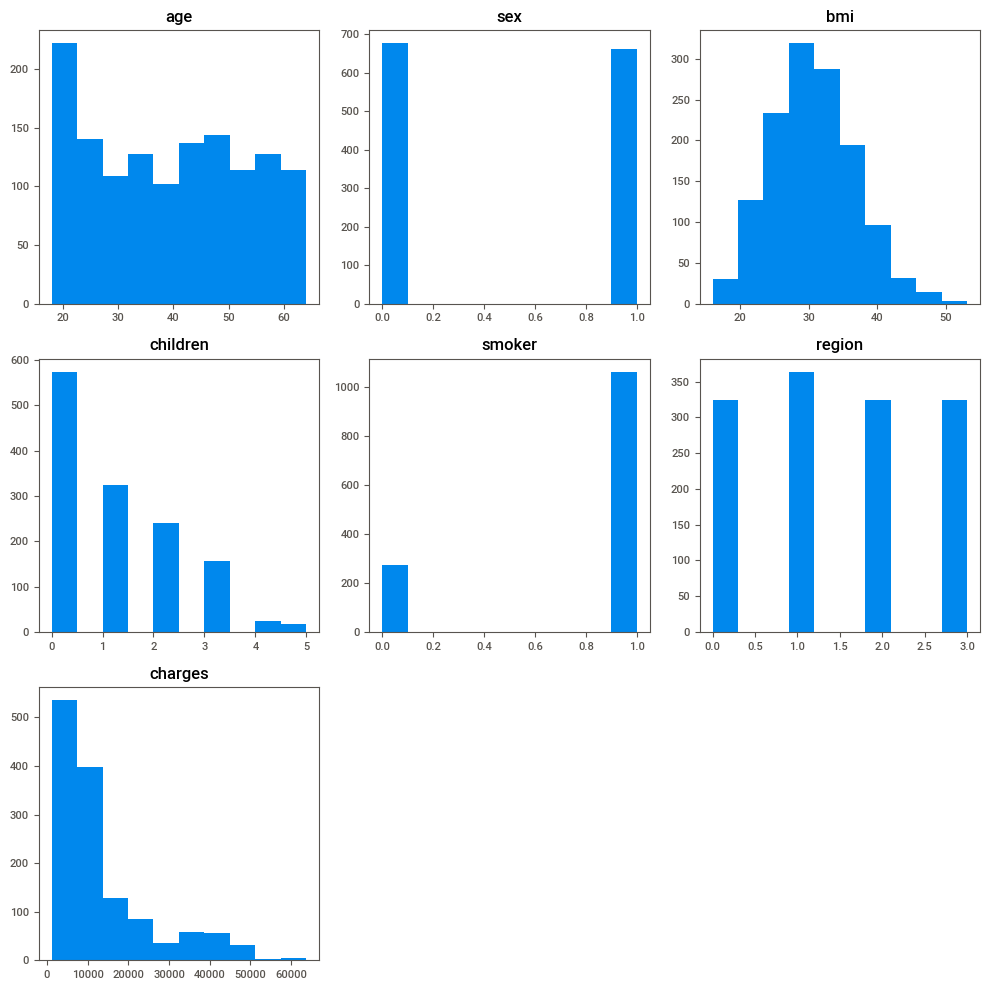

In [ ]:
plt.figure(figsize=(10,10))
for i,col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
df_corr=df.corr()
display(df_corr)

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,-0.016569,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,-0.002181,-0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,-0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,0.006208,1.000000


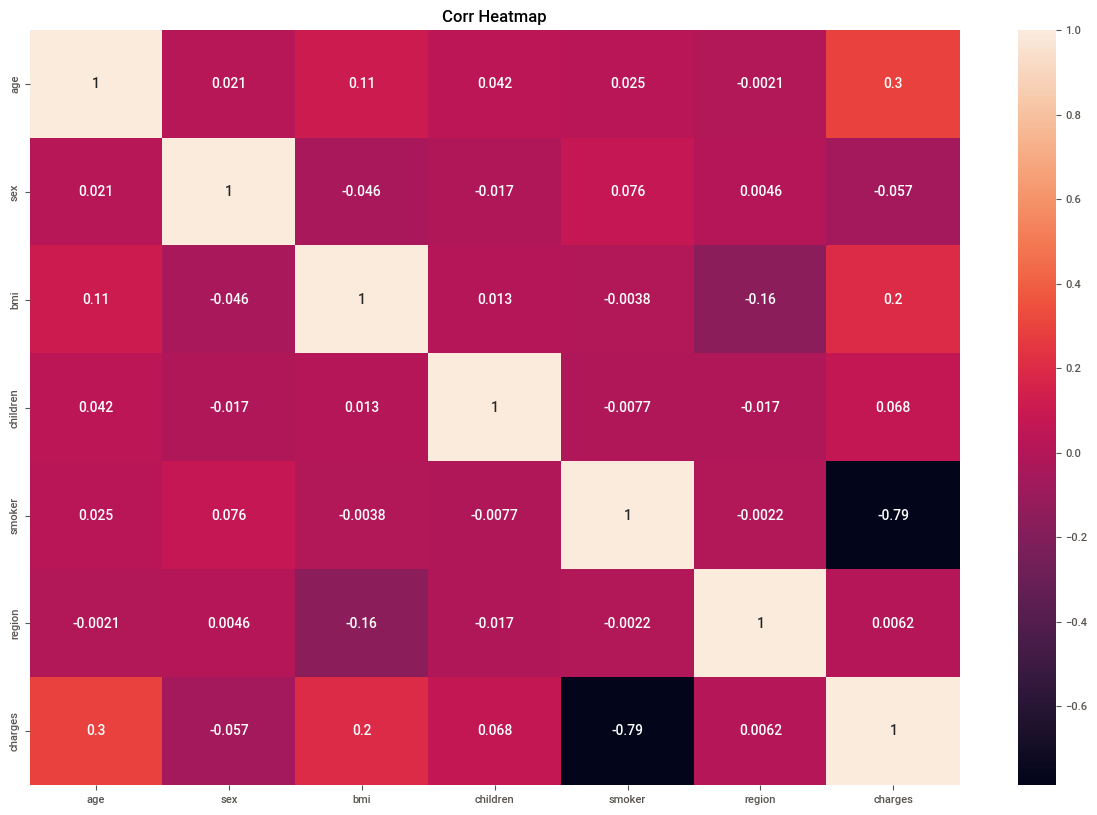

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True)
plt.title("Corr Heatmap")
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


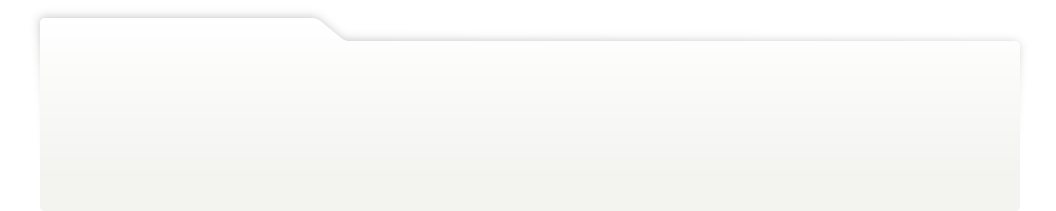
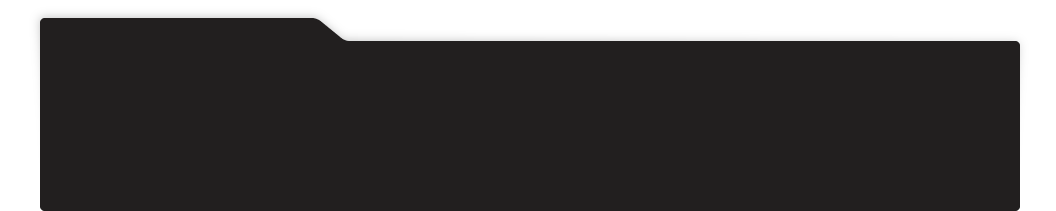
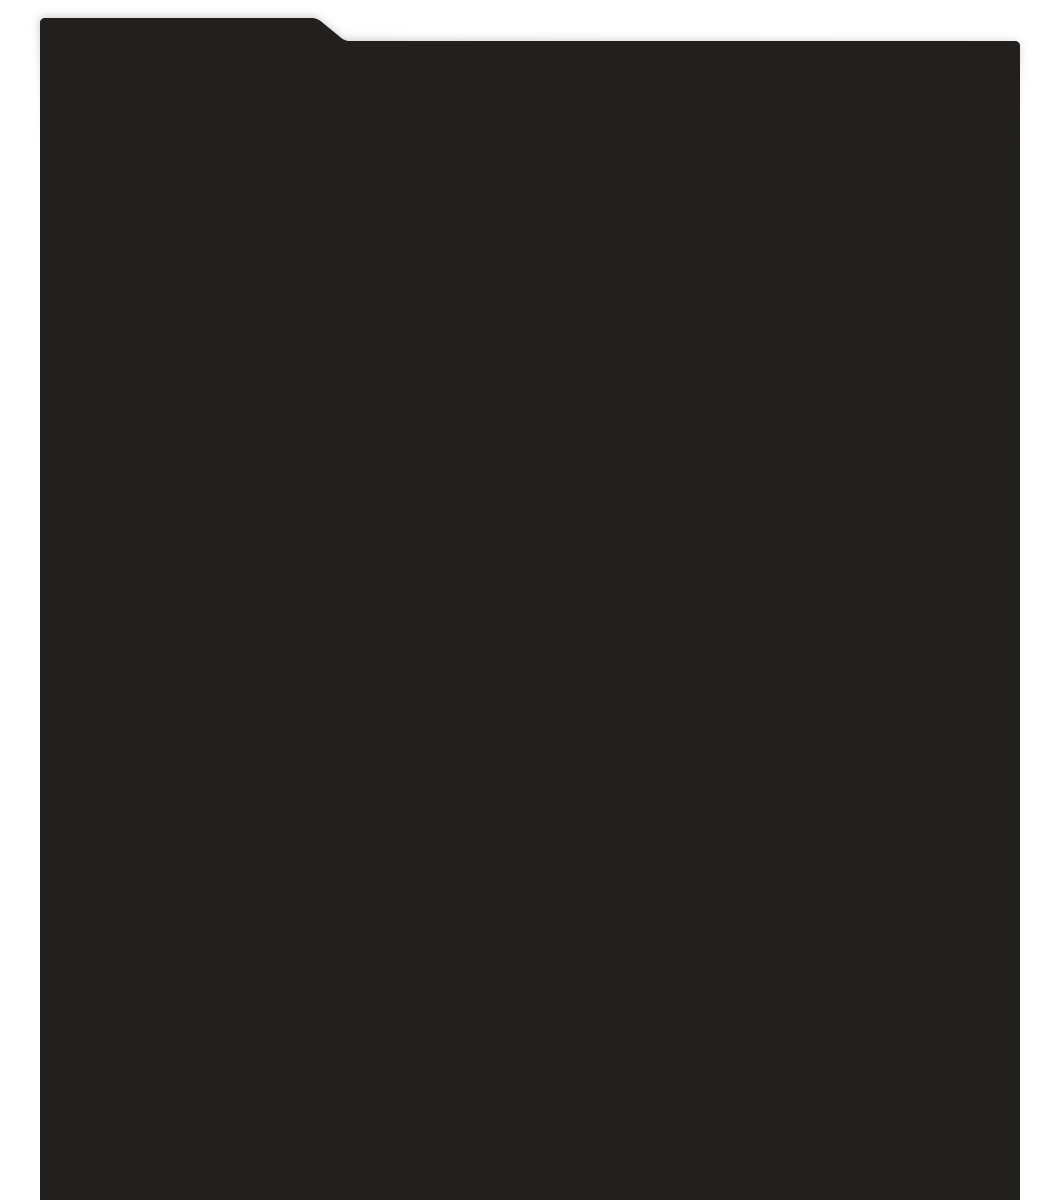
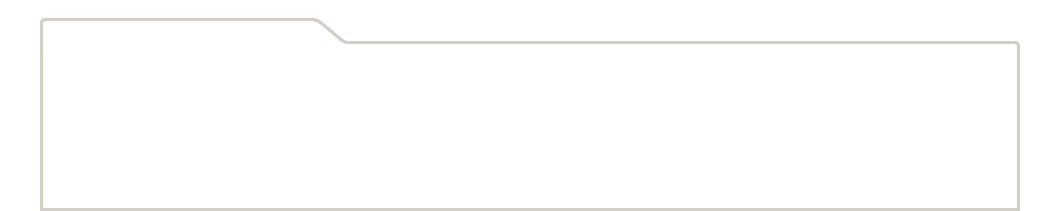
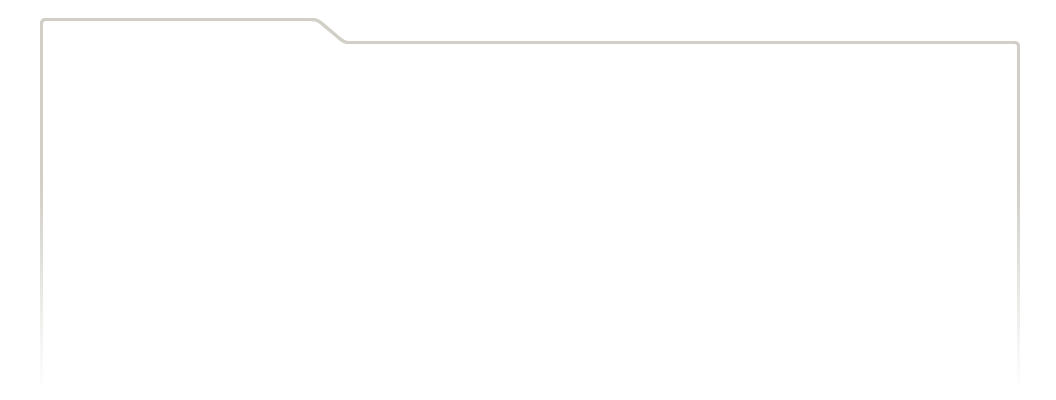
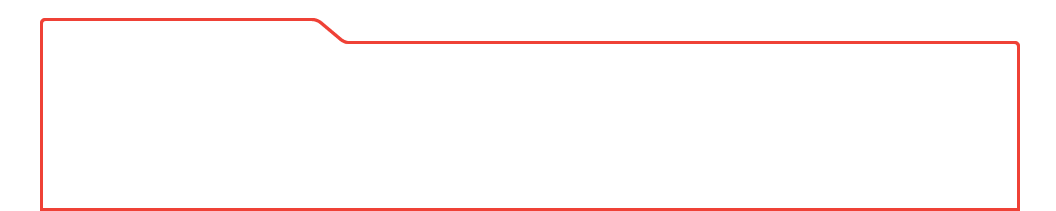
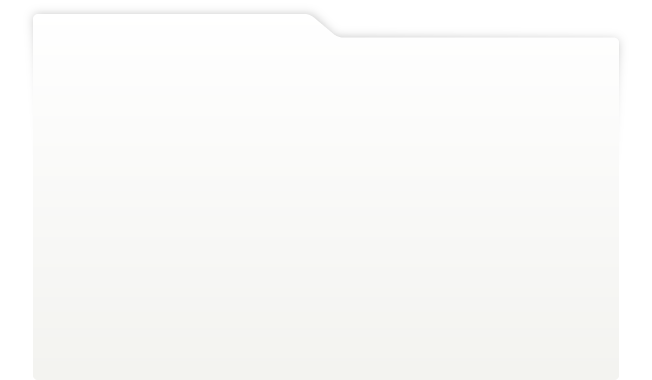
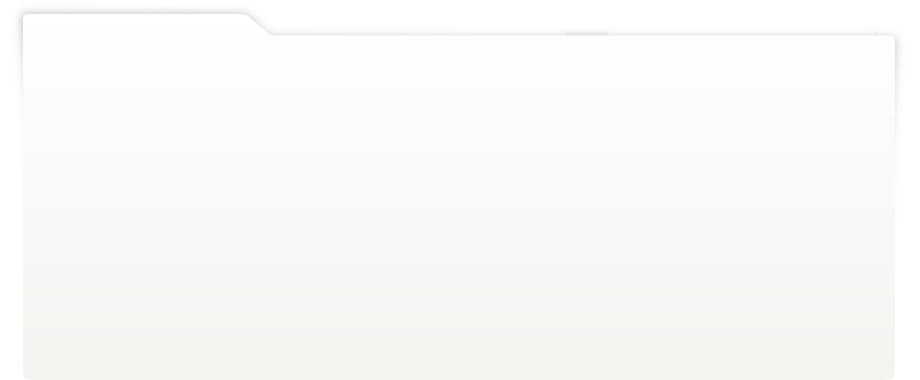
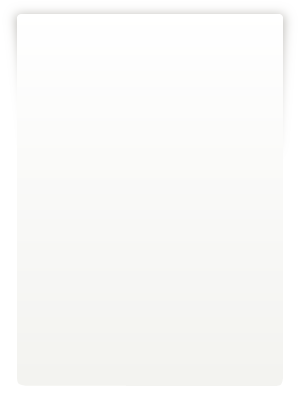
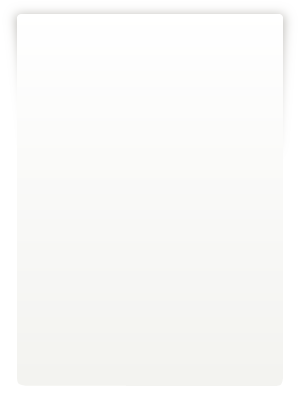
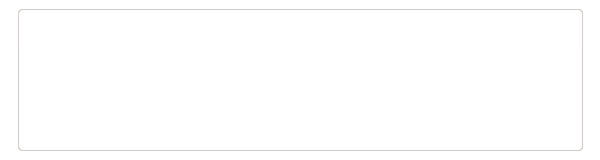
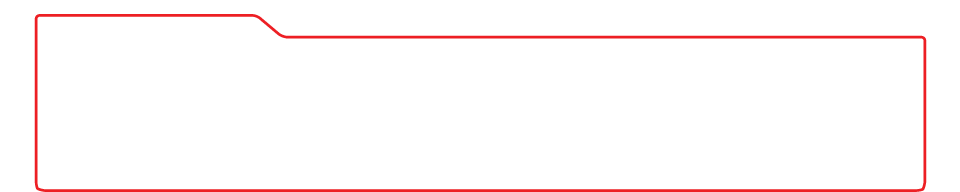
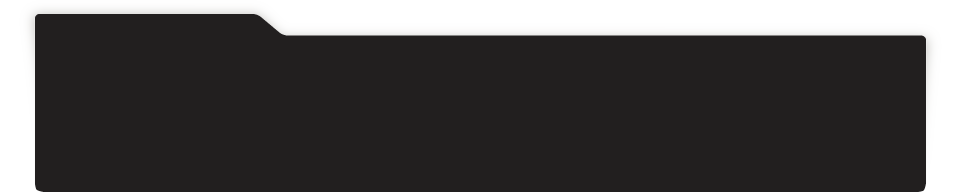
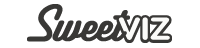
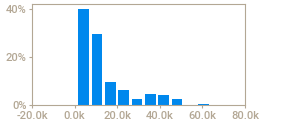
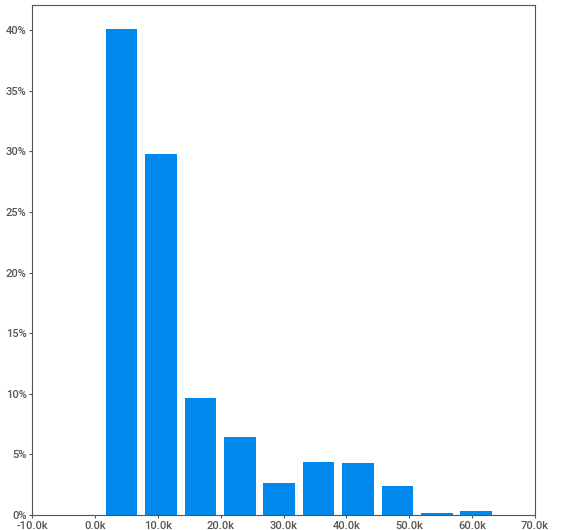
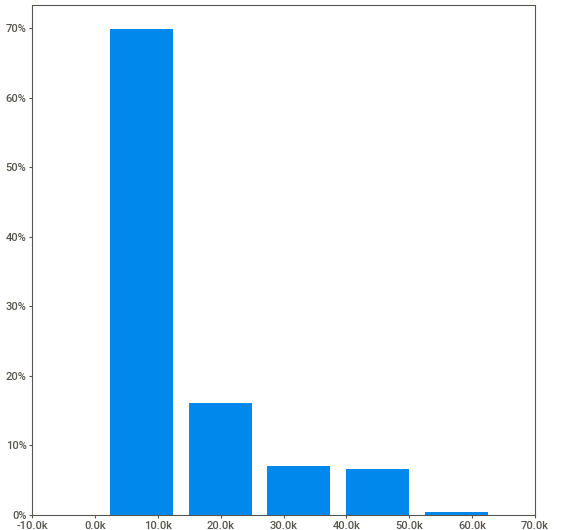
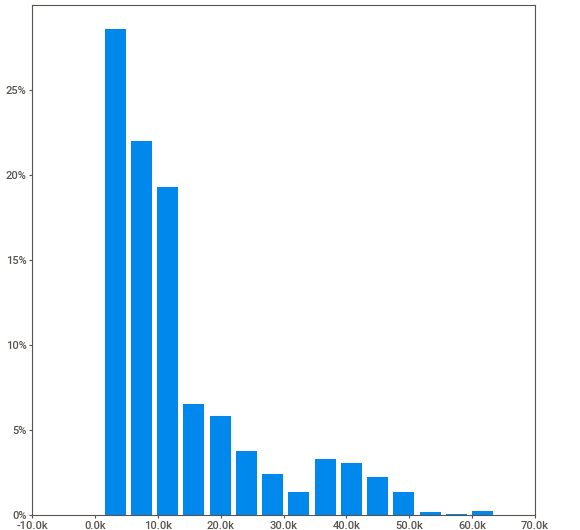
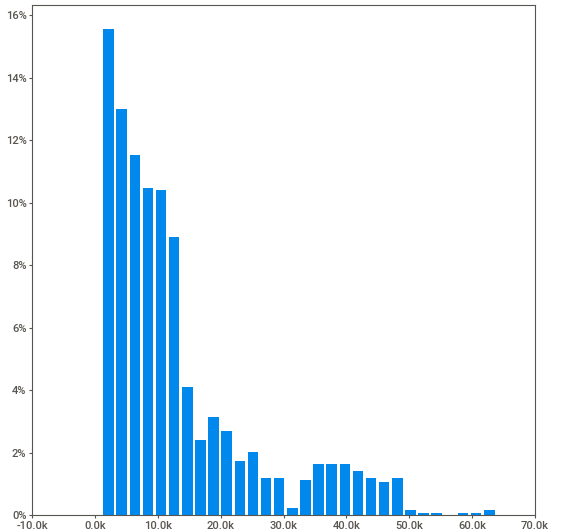
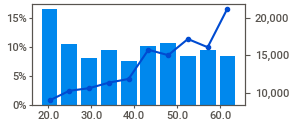
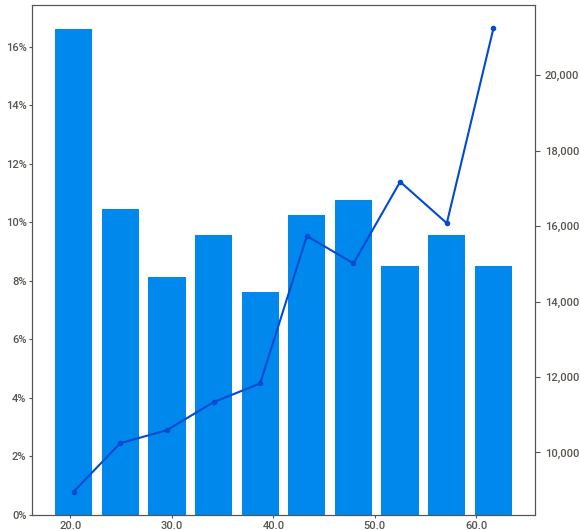
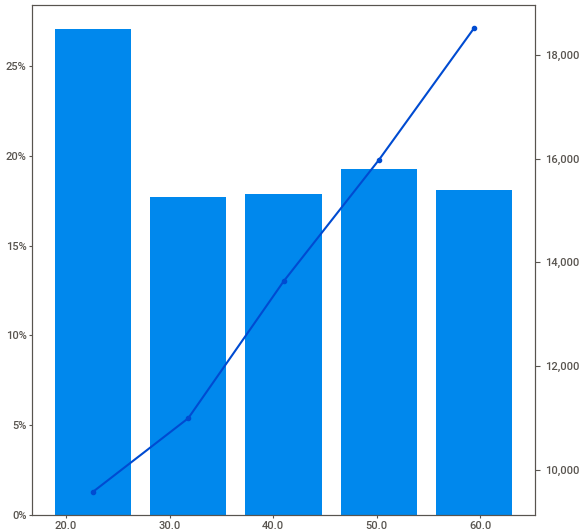
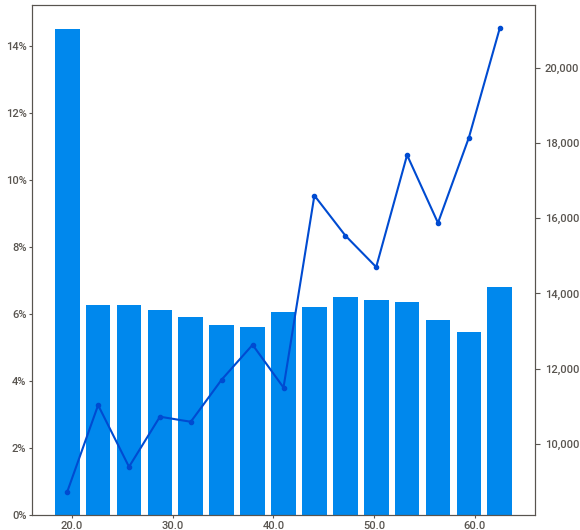
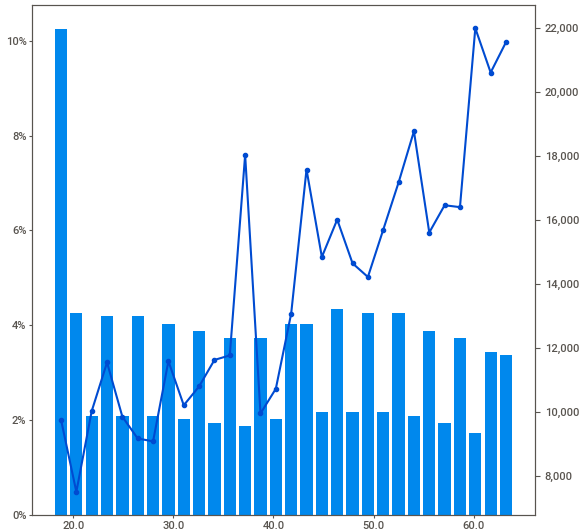
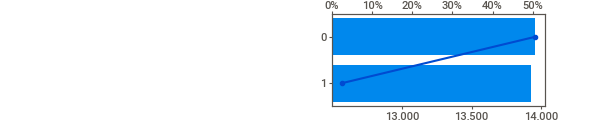
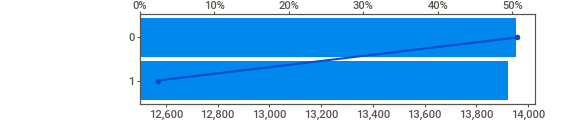
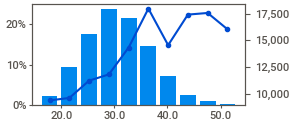
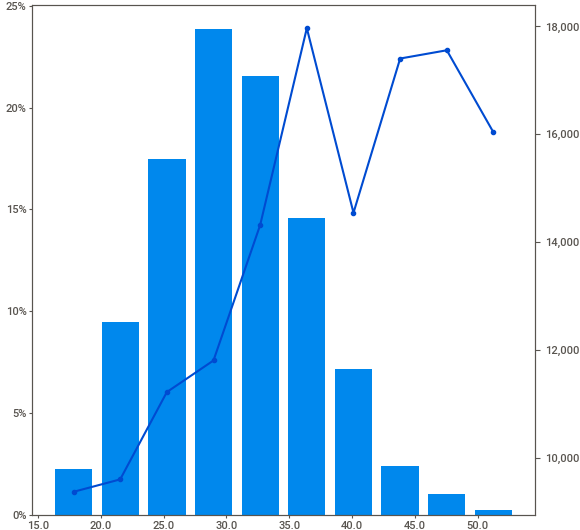
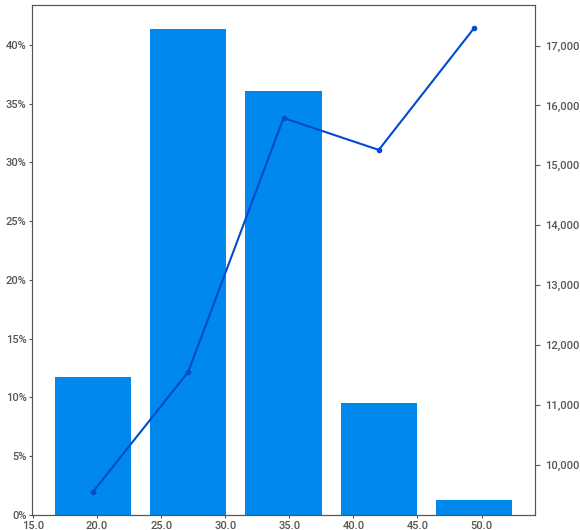
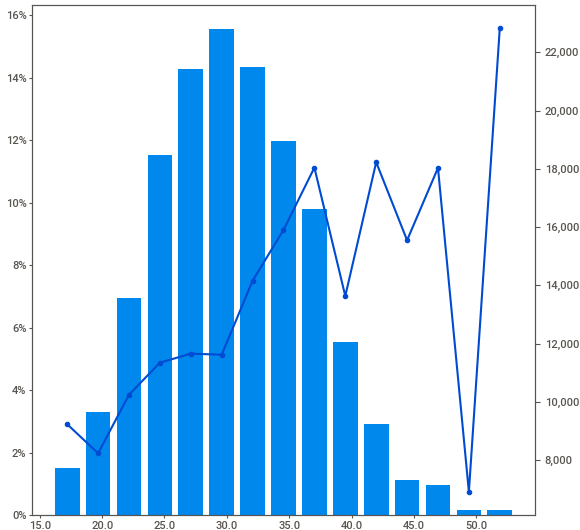
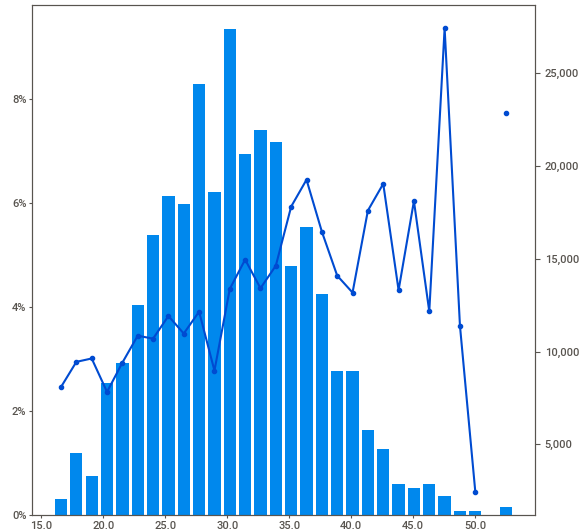
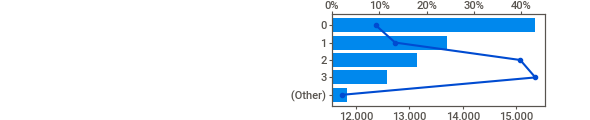
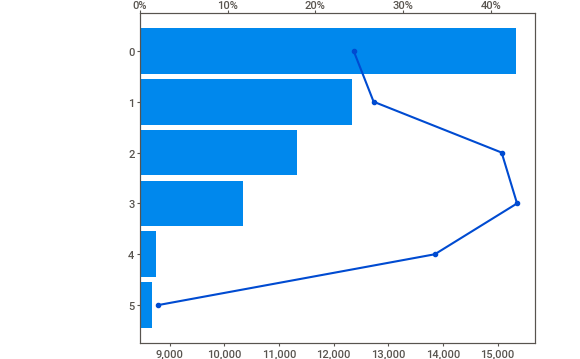
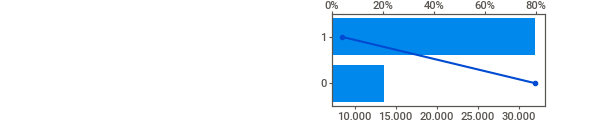
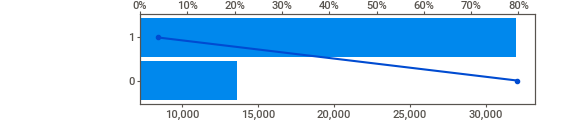
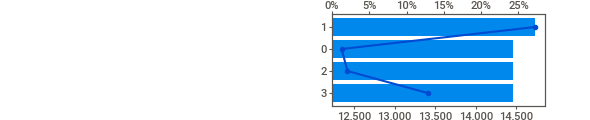
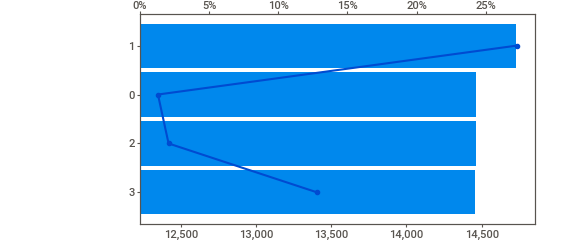
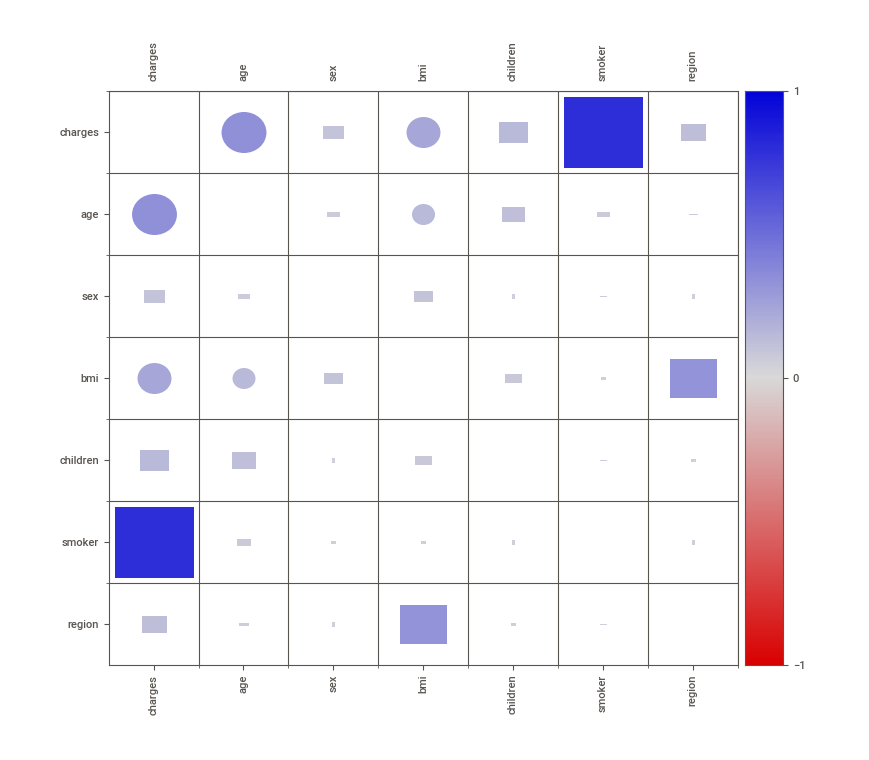
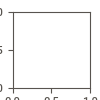

In [ ]:
# sweetvizを使って学習用データのサマリーを確認
report_train = sweetviz.analyze(df, # データフレーム 
                                target_feat='charges') # 目的変数の列名
report_train.show_notebook() # サマリーを表示

In [ ]:
#ホールドアウト法

# charges列以外を X, charges列を y に入れる
col_name = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
# 説明変数(X)
X = df[col_name]
#目的変数
y=df[['charges']]
from sklearn.model_selection import train_test_split
X2, y2 = df.iloc[:, 0:-1], df.iloc[:, -1]
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.2)

# 学習80% テスト20%で分割
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def get_eval_score(y_true,y_pred):
    mae=mean_absolute_error(y_true, y_pred)
    mse=mean_squared_error(y_true, y_pred)
    rmse=np.sqrt(mse)
    r2score=r2_score(y_true, y_pred)
    #誤差を測定する
    print(f" MAE={mae}")
    print(f" MSE={mse}")
    #RMSEが小さければ小さいほど機械学習モデルの性能がよい
    print(f" RMSE={rmse}")
    #モデルの適合度合いを測定する
    print(f" R2={r2score}")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def residual_plot(y_train_pred,y_train,y_val_pred,y_val):
    plt.scatter(y_train_pred,y_train_pred - y_train,label="train")
    plt.scatter(y_val_pred,y_val_pred - y_val,label="val")
    plt.plot([0,50],[0,0],color="red")
    plt.xlabel("Pred")
    plt.ylabel("Pred-True")
    plt.title("Residual Plot")
    plt.legend()
    plt.show()

X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.transform(X_val)

                                             |          | [  0%]   00:00 -> (? left)


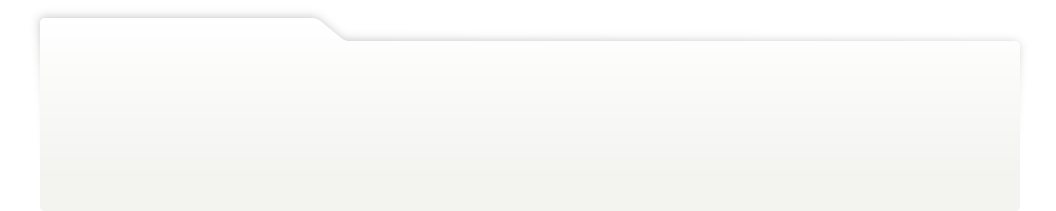
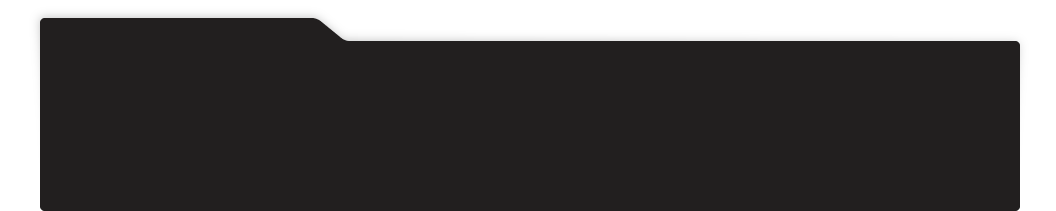
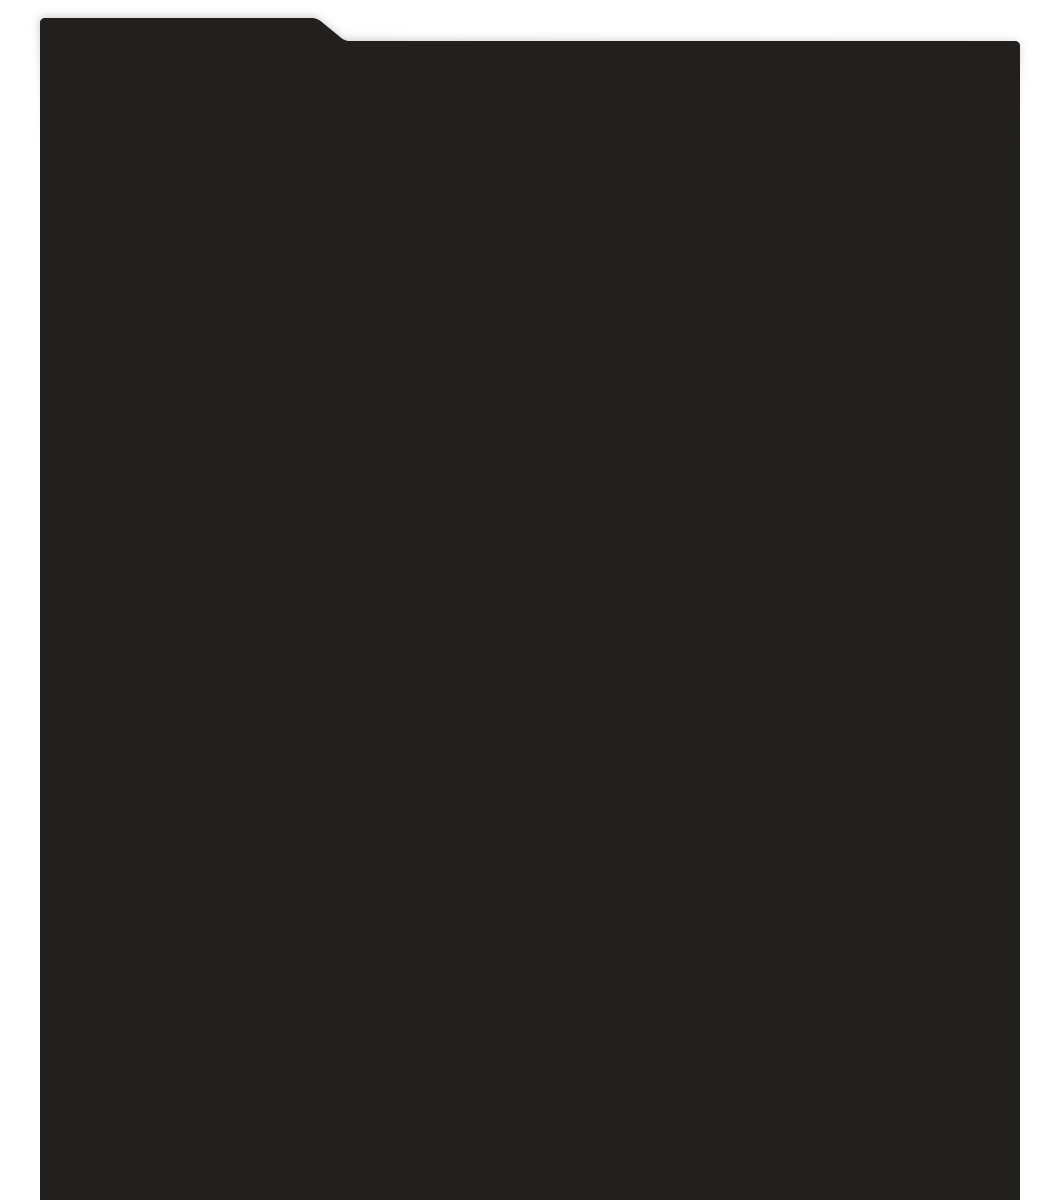
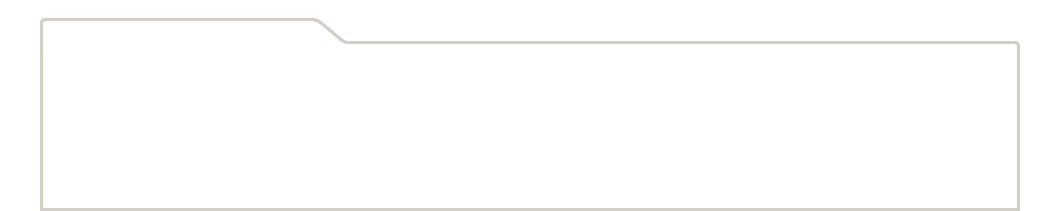
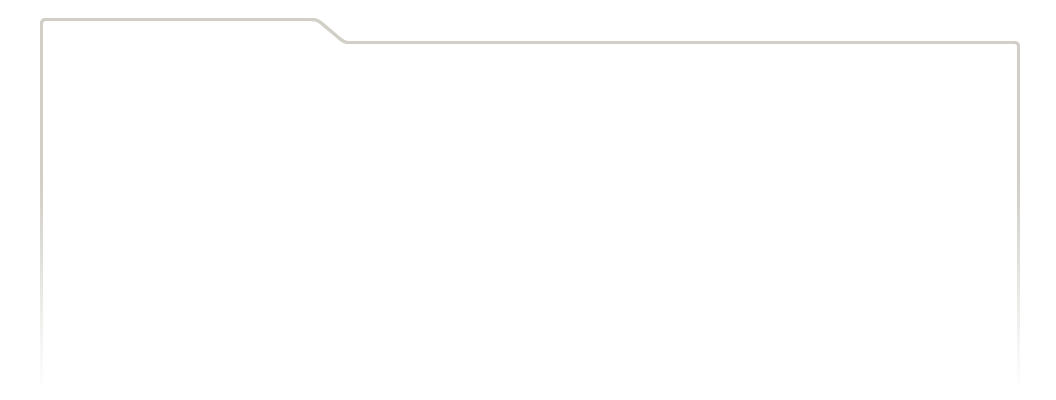
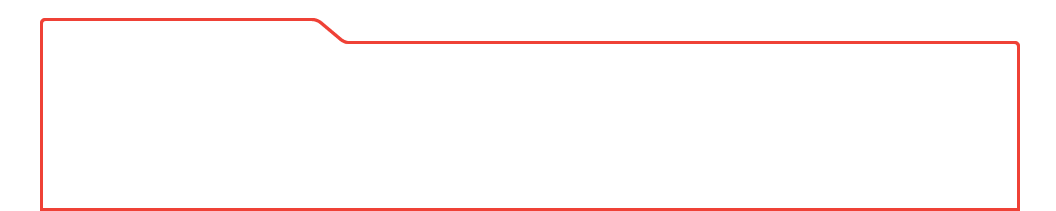
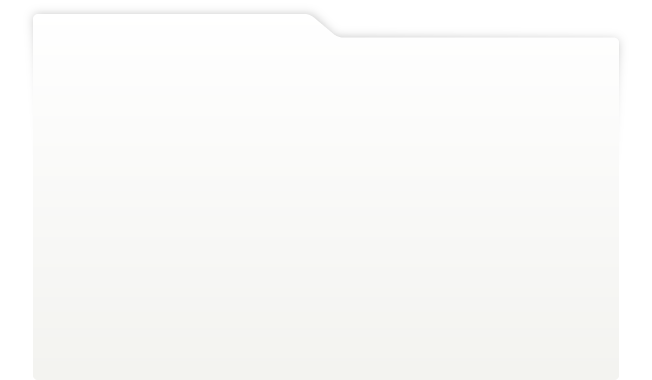
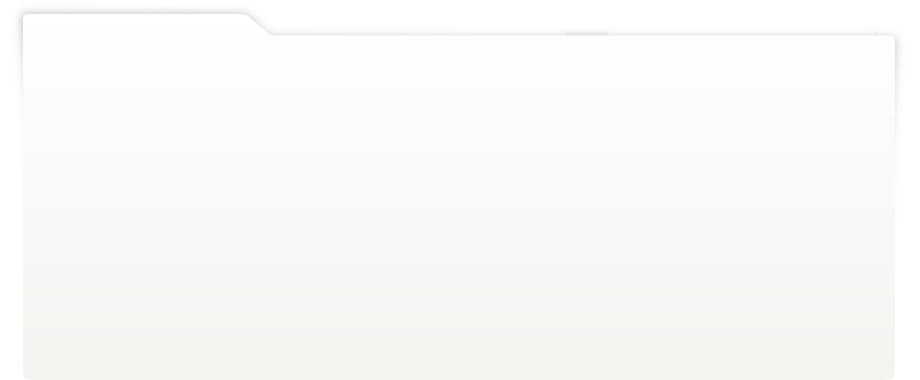
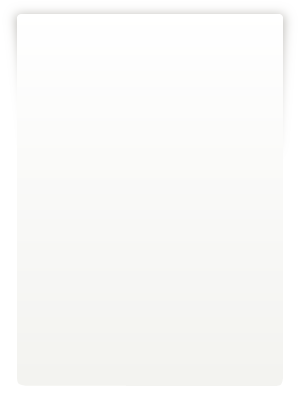
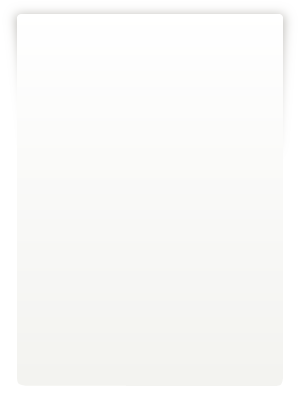
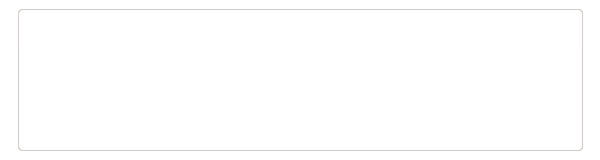
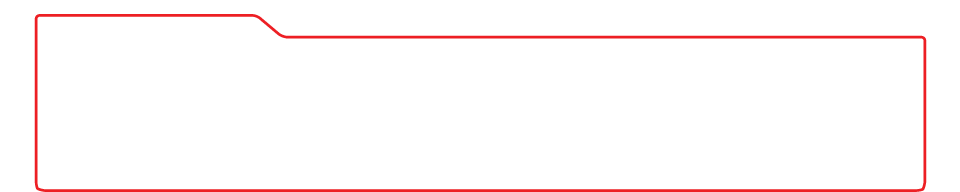
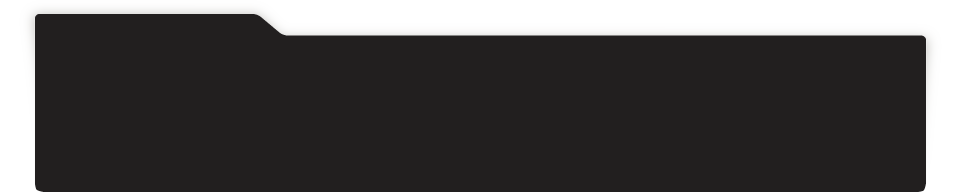
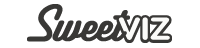
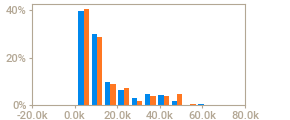
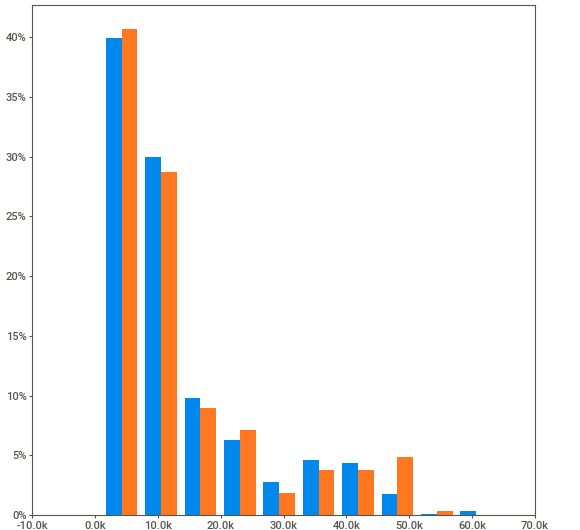
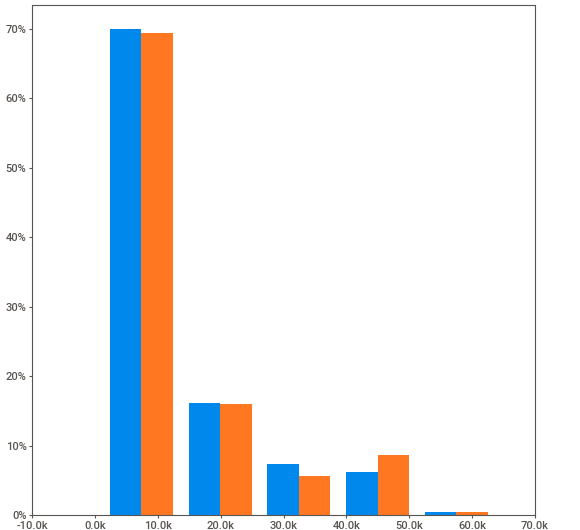
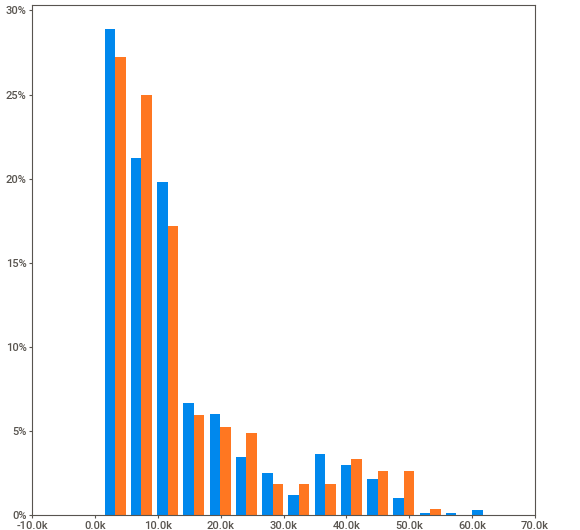
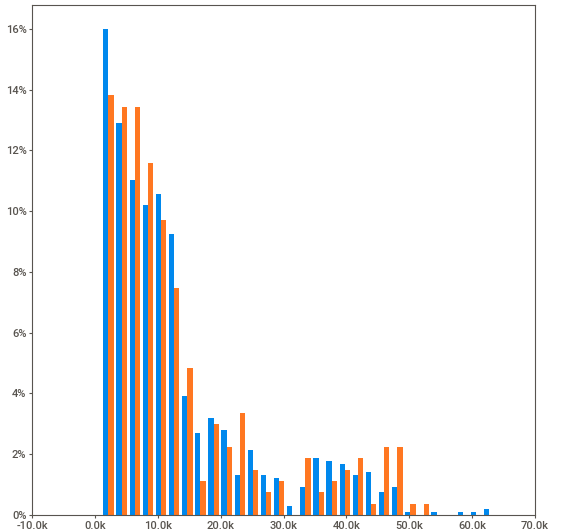
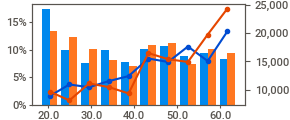
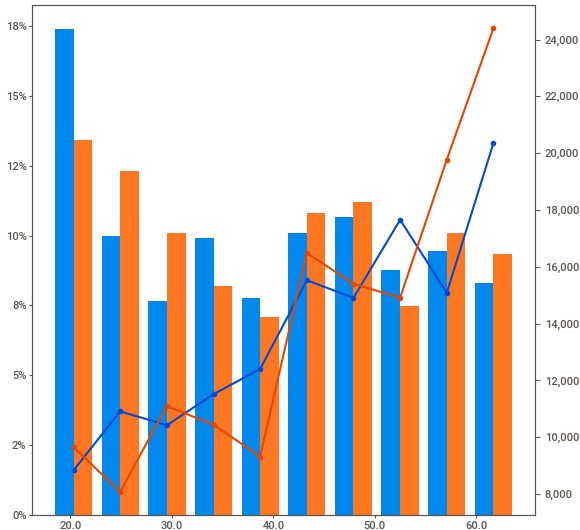
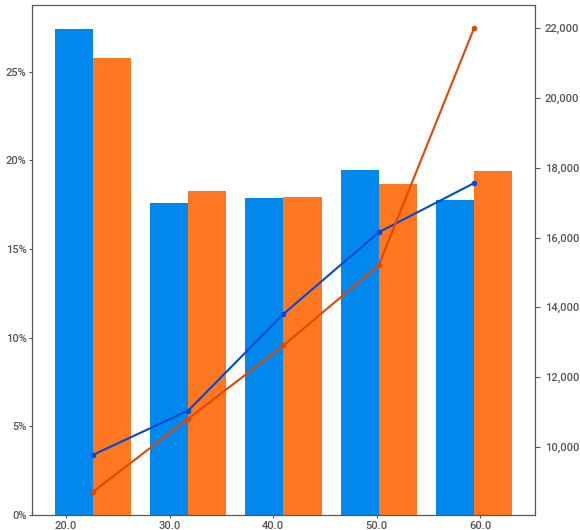
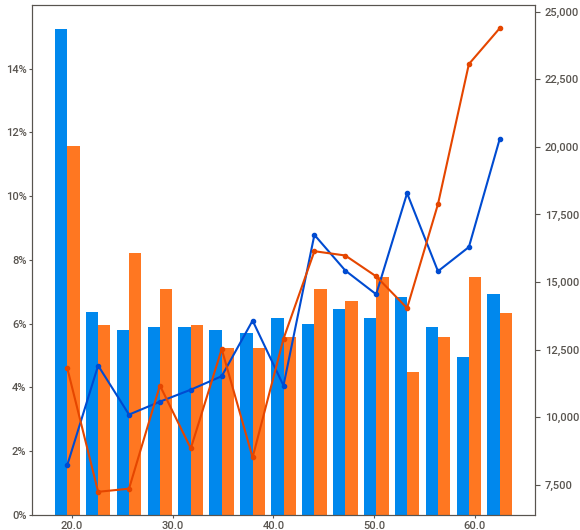
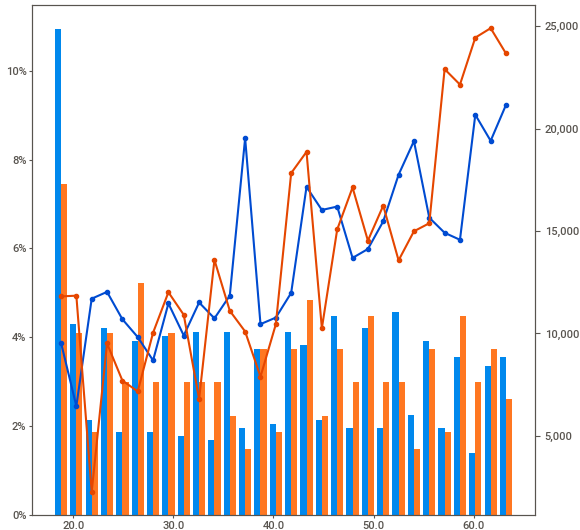
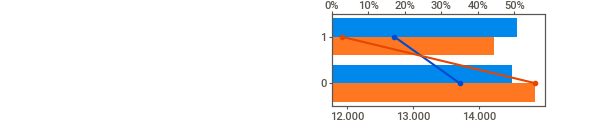
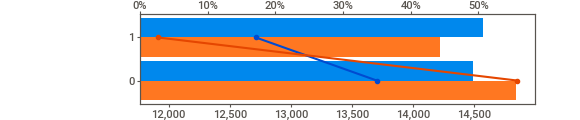
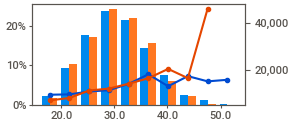
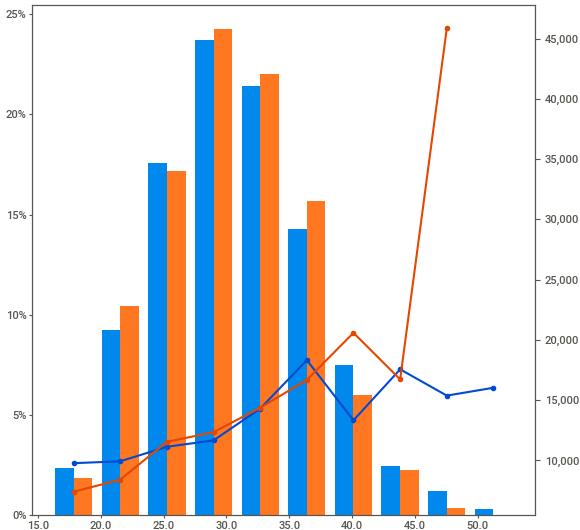
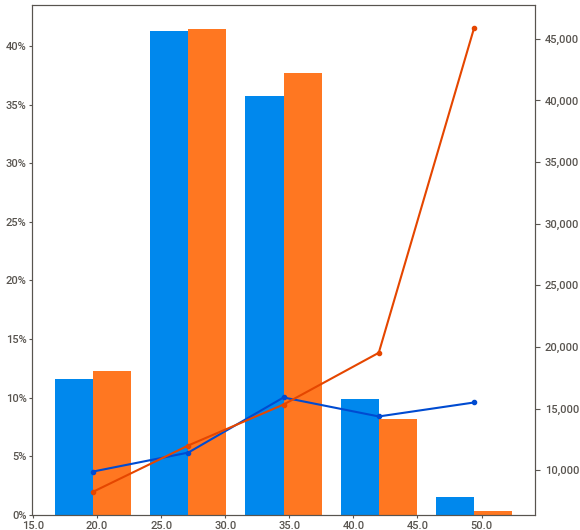
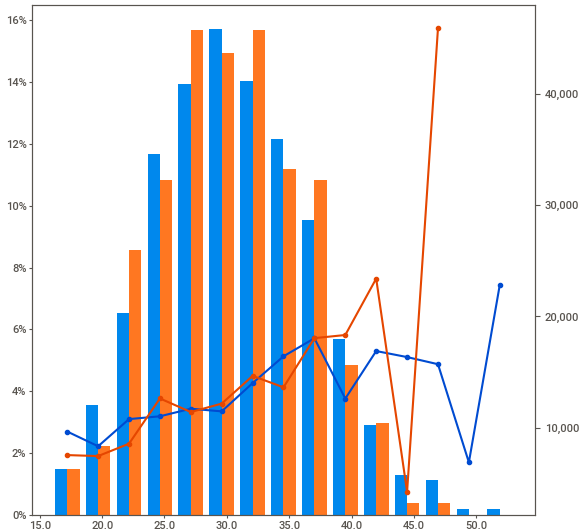
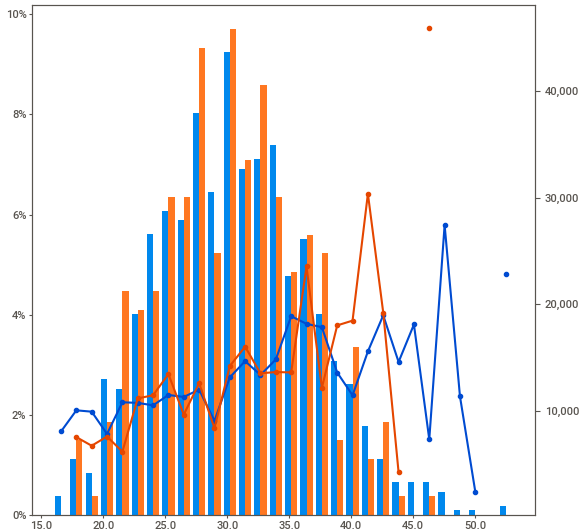
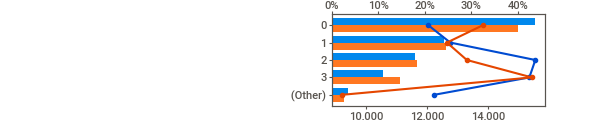
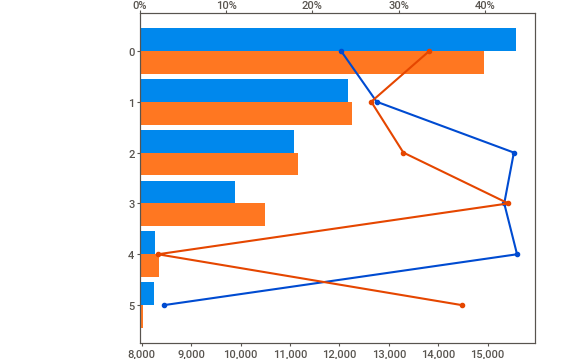
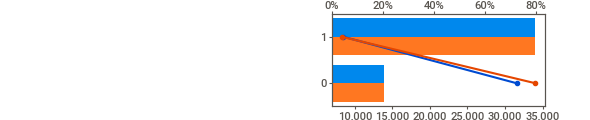
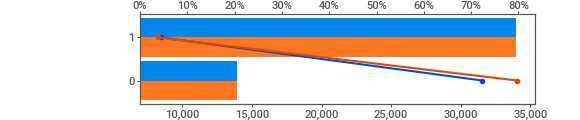
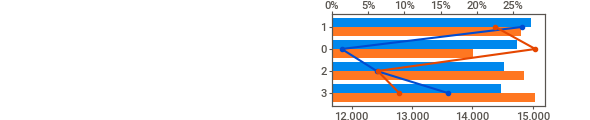
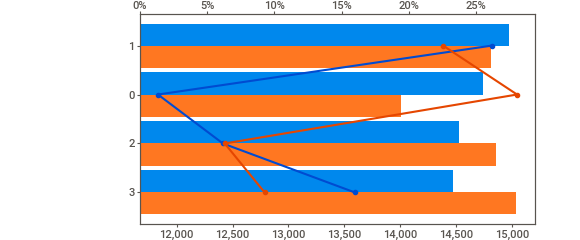
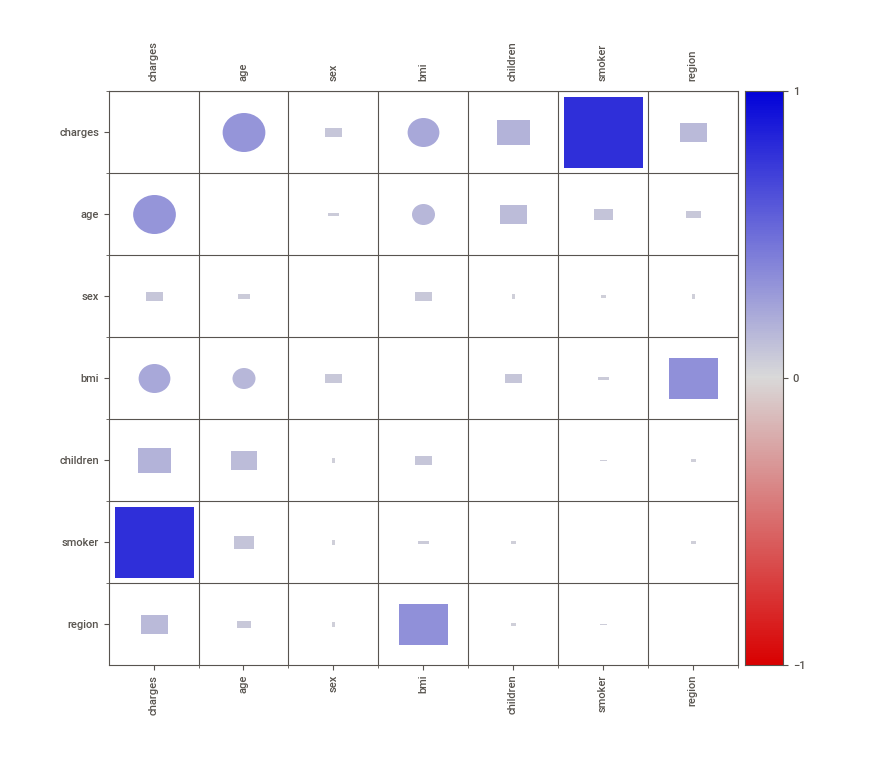
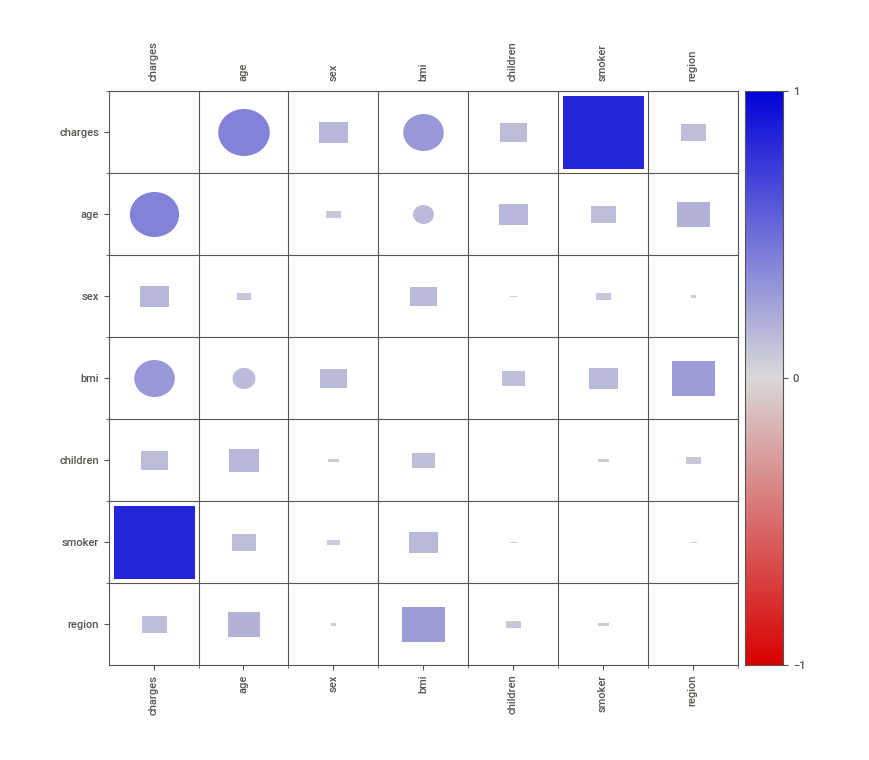

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_val, y_val], axis=1)
# 学習用データとテスト用データの比較を行う
report_train_vs_test = sweetviz.compare([df_train, "Train"], # [学習用データのデータフレーム, 表示名]
                                        [df_test, "Test"], # [テスト用データのデータフレーム, 表示名]
                                        'charges') # 目的変数の列名
report_train_vs_test.show_notebook() # 比較結果のサマリを表示

## scikit-learn

In [ ]:
# scikit-learn の勾配ブースティング木は欠損値の取り扱いが含まれていない
# 今回は，特徴量がすべて 0 以上なので，欠損値を -1 に変換
X_train_nan2minus1 = X_train.replace({np.nan: -1})
X_val_nan2minus1 = X_val.replace({np.nan: -1})

scikit-learnのRidgeの訓練データスコア
 MAE=4236.36716262259
 MSE=37729676.79091497
 RMSE=6142.448761765536
 R2=0.7368299512684899
scikit-learnのRidgeの検証データスコア
 MAE=3932.164022675856
 MSE=31857319.043472182
 RMSE=5644.228826285499
 R2=0.7998031383996457
w0(age)=3573.0284750213114
w1(sex)=11.687820410252233
w2(bmi)=2028.9840373228108
w3(childre)=536.8010276253506
w4(smoker)=-9500.043774991187
w5(region)=318.81027510849503
b=13201.182056009347


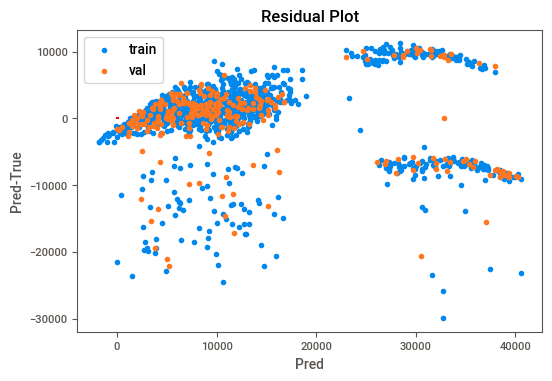

In [ ]:
#Use Ridge

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled,y_train)

y_train_pred=ridge.predict(X_train_scaled)
y_val_pred=ridge.predict(X_val_scaled)
    
print("scikit-learnのRidgeの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのRidgeの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),ridge.coef_[0])):
    print(f"w{i}({col})={coef}")
    
print(f"b={ridge.intercept_[0]}")

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

In [ ]:
ridge.coef_[0]

array([ 3573.02847502,    11.68782041,  2028.98403732,   536.80102763,
       -9500.04377499,   318.81027511])

In [ ]:
ridge.coef_

array([[ 3573.02847502,    11.68782041,  2028.98403732,   536.80102763,
        -9500.04377499,   318.81027511]])

scikit-learnのLinearRegressionの訓練データスコア
 MAE=4235.383876032093
 MSE=37729580.50984919
 RMSE=6142.440924408568
 R2=0.7368306228430945
scikit-learnのLinearRegressionの検証データスコア
 MAE=3930.333273901142
 MSE=31845929.134159446
 RMSE=5643.219748880903
 R2=0.7998747145449958
w0(age)=3576.6214771474083
w1(sex)=12.160915671082648
w2(bmi)=2030.7087428811271
w3(childre)=536.8542944027187
w4(smoker)=-9509.156510566463
w5(region)=319.054719651893
b=13201.182056009347


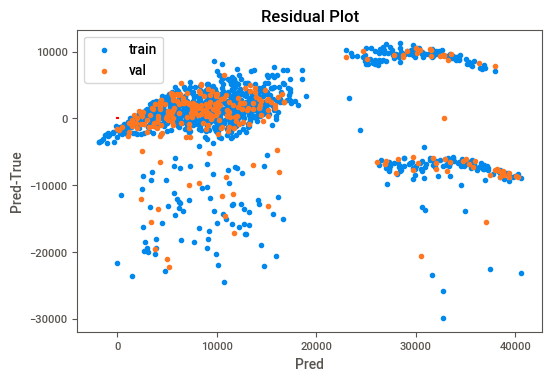

In [ ]:
#use LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression().fit(X_train_scaled,y_train)
y_train_pred=multi_reg.predict(X_train_scaled)
y_val_pred=multi_reg.predict(X_val_scaled)
    
print("scikit-learnのLinearRegressionの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのLinearRegressionの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),multi_reg.coef_[0])):
    print(f"w{i}({col})={coef}")
    
print(f"b={multi_reg.intercept_[0]}")

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

scikit-learnのLassoの訓練データスコア
 MAE=4235.275355416082
 MSE=37729586.77201999
 RMSE=6142.441434154663
 R2=0.7368305791635315
scikit-learnのLassoの検証データスコア
 MAE=4235.275355416082
 MSE=37729586.77201999
 RMSE=6142.441434154663
 R2=0.7368305791635315
w0(age)=3575.7980052704806
w1(sex)=11.059013328945893
w2(bmi)=2029.5901738188315
w3(childre)=535.8627390039067
w4(smoker)=-9508.09062618493
w5(region)=317.89266852440267
b=[13201.18205601]


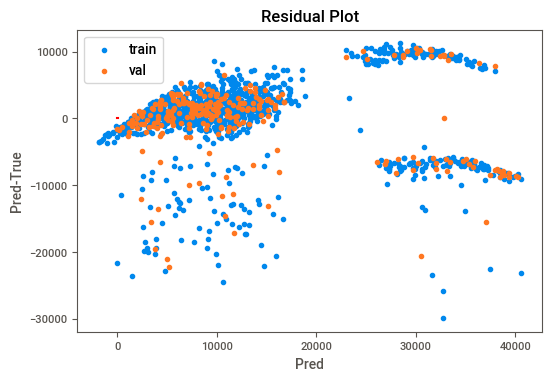

In [ ]:
#use Lasso
from sklearn.linear_model import Lasso

lasso_reg  = Lasso().fit(X_train_scaled,y_train)
y_train_pred=lasso_reg.predict(X_train_scaled)
y_val_pred=lasso_reg.predict(X_val_scaled)
    
print("scikit-learnのLassoの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのLassoの検証データスコア")
get_eval_score(y_train,y_train_pred)

for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),lasso_reg.coef_)):
    print(f"w{i}({col})={coef}")
    
print(f"b={lasso_reg.intercept_}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

scikit-learnのKNeighborsRegressorの訓練データスコア
 MAE=2631.800287358878
 MSE=19311752.7447332
 RMSE=4394.513937255541
 R2=0.8652976822704698
scikit-learnのKNeighborsRegressorの検証データスコア
 MAE=3106.7512961455222
 MSE=23811302.062757954
 RMSE=4879.682578073901
 R2=0.850365690311942


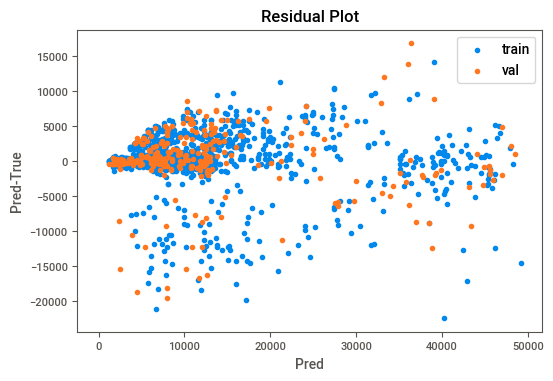

In [ ]:
#use Kneighbors#クラスタリング＃重みなし
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor().fit(X_train_scaled,y_train)
y_train_pred=knn_reg.predict(X_train_scaled)
y_val_pred=knn_reg.predict(X_val_scaled)
    
print("scikit-learnのKNeighborsRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのKNeighborsRegressorの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),knn_reg.coef_)):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={knn_reg.intercept_}")

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scikit-learnのSVRの訓練データスコア
 MAE=8244.834299737815
 MSE=156743619.82773688
 RMSE=12519.729223419206
 R2=-0.0933098180780485
scikit-learnのSVRの検証データスコア
 MAE=8574.67632522317
 MSE=175139895.36376122
 RMSE=13234.043046769993
 R2=-0.10060916755090288


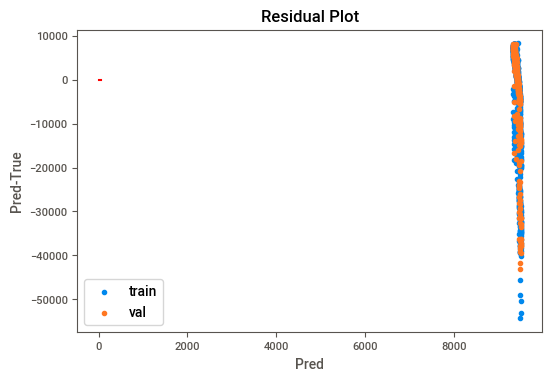

In [ ]:
#use Support vector classifier (linear kernel)#分類：重みなし
from sklearn.svm import SVR

SVR_reg = SVR().fit(X_train_scaled,y_train)
y_train_pred=SVR_reg.predict(X_train_scaled)
y_val_pred=SVR_reg.predict(X_val_scaled)

print("scikit-learnのSVRの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのSVRの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),SVR_reg.coef_)):
#print(f"w{i}({col})={coef}")
    
# print(f"b={SVR_reg.intercept_}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


scikit-learnのRandomForestRegressorの訓練データスコア
 MAE=7682.385395220561
 MSE=116101046.83024143
 RMSE=10775.019574471382
 R2=0.19017811041913746
scikit-learnのRandomForestRegressorの検証データスコア
 MAE=7827.1064854179085
 MSE=121066691.8509071
 RMSE=11003.031030171054
 R2=0.23919612570615278


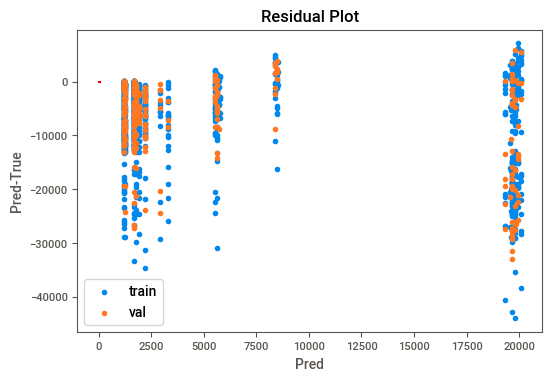

In [ ]:
#use Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10,max_depth=20,random_state=0).fit(X_train,y_train)
y_train_pred=rf_reg.predict(X_train_scaled)
y_val_pred=rf_reg.predict(X_val_scaled)
    
print("scikit-learnのRandomForestRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのRandomForestRegressorの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),rf_reg.coef_[0])):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={rf_reg.intercept_[0]}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

scikit-learnのDecisionTreeRegressorの訓練データスコア
 MAE=7462.733841990655
 MSE=105011315.1730997
 RMSE=10247.502874998361
 R2=0.2675306209323499
scikit-learnのDecisionTreeRegressorの検証データスコア
 MAE=7498.902030767413
 MSE=108716233.37775806
 RMSE=10426.70769599676
 R2=0.3168085268713595


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


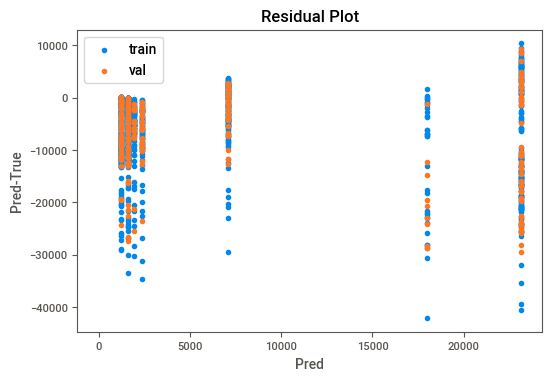

In [ ]:
#use decision tree＃分類　重みなし
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=50,min_samples_leaf=2,random_state=0).fit(X_train,y_train)
y_train_pred=tree_reg.predict(X_train_scaled)
y_val_pred=tree_reg.predict(X_val_scaled)
    
print("scikit-learnのDecisionTreeRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのDecisionTreeRegressorの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),tree_reg.coef_[0])):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={tree_reg.intercept_[0]}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)


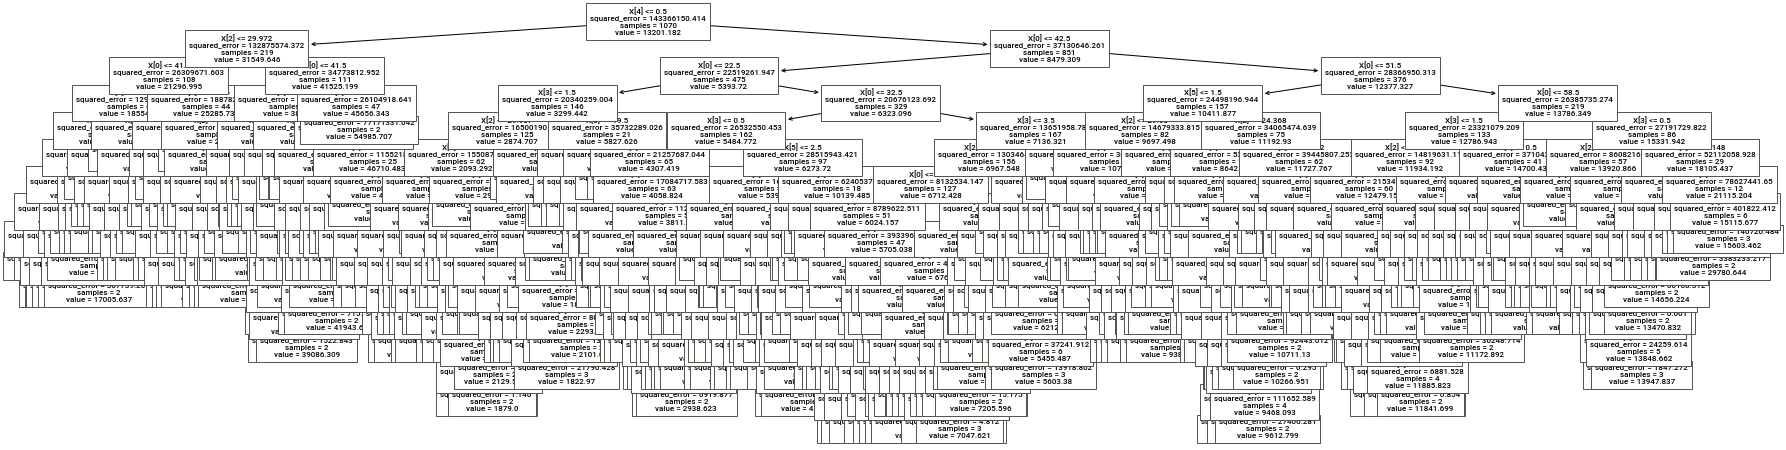

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30, 8))
tree.plot_tree(tree_reg,fontsize=8)
print()

In [ ]:
#予測値の算出
y_train_pred=tree_reg.predict(X_train_scaled)
y_val_pred=tree_reg.predict(X_val_scaled)

import numpy as np

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_val_pred))
print(y_val_pred[:5])


1070
[[17961.1801    ]
 [ 1242.21366667]
 [23146.5054    ]
 [ 1967.587     ]
 [ 1611.6384    ]]
268
[[ 1242.21366667]
 [ 1611.6384    ]
 [23146.5054    ]
 [ 1242.21366667]
 [ 1611.6384    ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


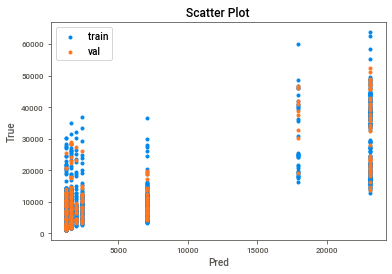

In [ ]:
#散布図
plt.scatter(y_train_pred,y_train,label="train")
plt.scatter(y_val_pred,y_val,label="val")
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Scatter Plot")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  "X does not have valid feature names, but"


scikit-learnのGradientBoostingRegressorの訓練データスコア
 MAE=7767.58283053439
 MSE=121760093.34346493
 RMSE=11034.495608928617
 R2=0.1507054280817811
scikit-learnのGradientBoostingRegressorの検証データスコア
 MAE=7992.856273725118
 MSE=130084340.6158355
 RMSE=11405.452231973772
 R2=0.18252767286837712


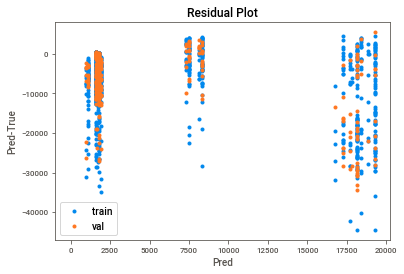

In [ ]:
#use GradientBoosting　　重みなし
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=43, # 何個の木を作成するか（=イテレーション数）
                                      learning_rate=0.1,  # 学習率（今回はデフォルト値）
                                      random_state=0, # シード値
                                       max_depth=8
                                      ).fit(X_train,y_train)
y_train_pred=gb_reg.predict(X_train_scaled)
y_val_pred=gb_reg.predict(X_val_scaled)
    
print("scikit-learnのGradientBoostingRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのGradientBoostingRegressorの検証データスコア")
get_eval_score(y_val,y_val_pred)

# print(f"alpha={ridge.alpha_}")
# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),forest_reg.coef_)):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={forest_reg.intercept_}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)


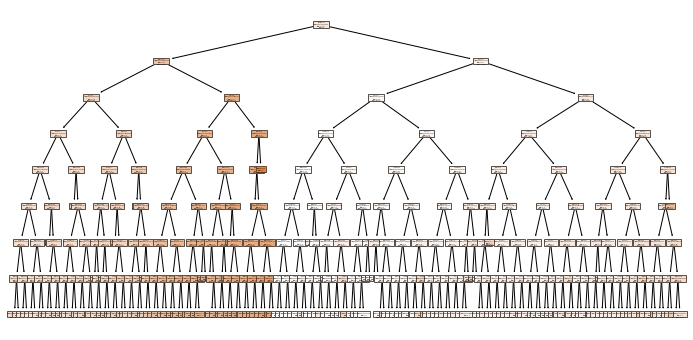

In [ ]:
from sklearn import tree
plt.figure(figsize=(12, 6))
num_trees = 0 # 何番目のモデルを表示するか
tree.plot_tree(gb_reg.estimators_[num_trees][0], # 弱学習器のインスタンス 
               feature_names=X_train_nan2minus1.columns, # 列名
               filled=True) # 色を塗るかどうか
print() 

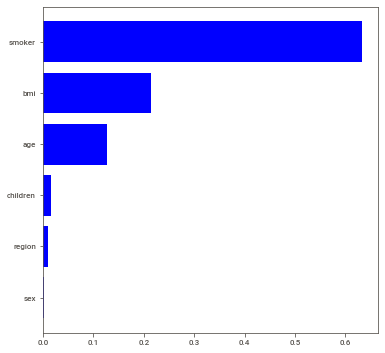

In [ ]:
#説明変数ごとの重要度
features=X_train.columns
importances=tree_reg.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)),importances[indices],color="b",align="center")
plt.yticks(range(len(indices)),features[indices])
plt.show()

In [ ]:
X_val_pred=X_val.copy()
X_val_pred["pred"]=np.round(tree_reg.predict(X_val),2)
X_val_pred.describe()[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X_val_pred.sort_values(["smoker","bmi","age"])


,age,sex,bmi,children,smoker,region,pred
989,24,1,20.520,0,0,3,14581.89
362,19,1,21.700,0,0,0,23146.51
58,53,1,22.880,1,0,1,21797.54
85,45,0,22.895,2,0,2,28373.33
156,48,0,24.420,0,0,1,21797.54
...,...,...,...,...,...,...,...
227,58,1,41.910,0,1,1,12107.95
1239,25,1,42.130,1,1,1,3148.91
656,26,1,42.400,1,1,0,3148.91
442,18,0,43.010,0,1,1,1155.13


## XGBoost

In [ ]:
#https://dataanablog.com/xgboost-regression-that-can-be-done-by-copy-and-paste/
#https://www.procrasist.com/entry/10-cross-validation
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
xgb_reg=XGBRegressor(random_state=0)
k_fold=KFold(n_splits=5,shuffle=True,random_state=0)
# 予測

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("検証データスコア")
get_eval_score(y_val,y_val_pred)

訓練データスコア
 MAE=7767.58283053439
 MSE=121760093.34346493
 RMSE=11034.495608928617
 R2=0.1507054280817811
検証データスコア
 MAE=7992.856273725118
 MSE=130084340.6158355
 RMSE=11405.452231973772
 R2=0.18252767286837712


In [ ]:
xgb_reg_grid=XGBRegressor()

from sklearn.model_selection import GridSearchCV

params={"booster":["gbtree"],
       "n_estimators":[10,30,50,100],
       "max_depth":[2,3,4,5,6],
       "learning_rate":[0.1,0.25,0.5,0.75,1.0],
       "colsample_bytree":[0.1,0.25,0.5,0.75,1.0],
       "random_state":[0]
       }

k_fold=KFold(n_splits=5,shuffle=True,random_state=0)
grid=GridSearchCV(estimator=xgb_reg_grid,
                          param_grid=params,
                          cv=k_fold,
                          scoring="r2")

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel("ERROR")
grid.fit(X_train, y_train) # 学習には約 1 分

print(grid.best_params_)#最も評価が高かった組み合わせ
print(grid.best_score_)#その組み合わせのスコア

# 予測

y_train_pred=grid.predict(X_train)
y_val_pred = grid.predict(X_val)
# y_train_pred=np.expand_dims(y_train_pred,1)
# y_val_pred=np.expand_dims(y_val_pred,1)


print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("検証データスコア")
get_eval_score(y_val,y_val_pred)

[04:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:05:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
xgb_reg_random=XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV
random=RandomizedSearchCV(estimator=xgb_reg_random,param_distributions=params,scoring="r2",cv=k_fold,n_iter=30,random_state=0)

In [ ]:
random.fit(X_train,y_train)
print(random.best_params_)
print(random.best_score_)

# 予測
y_train_pred = random.predict(X_train)
y_val_pred = random.predict(X_val)
y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("検証データスコア")
get_eval_score(y_val,y_val_pred)

[03:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
ls

drive/  sample_data/


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler([-1,1])
# 引数にdataという変数を入れた場合です
X_MinMaxScaler = scaler.fit_transform(y_val_pred)

ValueError: ignored

In [ ]:
# 予測
# y_train_pred = grid.predict(X_train)
# y_val_pred = grid.predict(X_val)
y_val_pred_df = pd.DataFrame({'XGB': grid.predict(X_val)})

df_val = X_val.copy()
df_val['y_true'] = y_val
df_val['y_pred'] = y_val_pred

 
# 投稿用csvの生成
 
submissionfile = pd.read_csv('/content/drive/MyDrive/0310/sample_submission.csv', index_col=0)
submissionfile=df_val
# submissionfile['charges'] = y_val_pred_df
submissionfile['X_MinMaxScaler'] = X_MinMaxScaler
# submissionfile.to_csv('./submissionfile.csv')


NameError: ignored

In [ ]:
submissionfile

In [ ]:
def high_score(x):
    if x>=0.8 or -0.8>=x:
        return 1
    else:
        return 0

In [ ]:
submissionfile['X_MinMaxScaler']

In [ ]:
submissionfile['dangerous']=submissionfile['X_MinMaxScaler'].apply(high_score)
submissionfile.head()

In [ ]:
import seaborn as sns
g = sns.jointplot(data=df_val, x='y_true', y='y_pred')

g.ax_joint.plot([0,1], [0,1], ':y', transform=g.ax_joint.transAxes)

# This is the x=y line using transforms
plt.show()

In [ ]:
import shap
explainer=shap.TreeExplainer(tree_reg)
explainer

In [ ]:
shap_values=explainer.shap_values(X_val)
shap_values

In [ ]:
shap.summary_plot(
    shap_values=shap_values,
    features=X_val,
    plot_type="bar",
    max_display=5)

In [ ]:
shap.summary_plot(
    shap_values=shap_values,
    features=X_val,
    plot_type="dot",
    max_display=5)

In [ ]:
shap.dependence_plot(
    ind="age",
    interaction_index=None,
    shap_values=shap_values,
    features=X_val,
)

In [ ]:
shap.dependence_plot(
    ind="age",
    interaction_index="bmi",
    shap_values=shap_values,
    features=X_val,
)

In [ ]:
shap.initjs()
row_index=X_val.index.get_loc(1034)
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[row_index,:],
    features=X_val.iloc[row_index,:])

In [ ]:
row_index=X_val.index.get_loc(1034)
shap.plots._waterfall.waterfall_legacy(
    expected_value=explainer.expected_value[0],
    shap_values=shap_values[row_index,:],
    features=X_train.iloc[row_index,:])

In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_val.shape,y_val.shape

## LightGBM

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=100, # 何個の木を作成するか（=イテレーション数）
                        learning_rate=0.1,  # 学習率（今回はデフォルト値）
                        gamma=0, # 末端ノードの個数に対する正則化係数（今回はデフォルト値）
                        reg_lambda=1, # 末端ノードの出力値に対する正則化係数（今回はデフォルト値）
                        random_state=0, # シード値
                        )

In [ ]:
%%time
lgbm.fit(X_train_scaled,y_train) 

In [ ]:
from lightgbm import LGBMRegressor
lgbm_reg = LGBMRegressor(n_estimators=500)

lgbm_reg.fit(X_train, y_train)

y_train_pred=lgbm_reg.predict(X_train_scaled)
y_val_pred = lgbm_reg.predict(X_val_scaled)

print("scikit-learnのLGBMRegressorの訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("scikit-learnのLGBMRegressorの検証データスコア")
get_eval_score(y_train,y_train_pred)

# for i,(col,coef) in enumerate(zip(df.columns.to_numpy().astype('<U7'),lgbm_reg.coef_[0])):
#     print(f"w{i}({col})={coef}")
    
# print(f"b={lgbm_reg.intercept_[0]}")

y_train_pred=np.expand_dims(y_train_pred,1)
y_val_pred=np.expand_dims(y_val_pred,1)

residual_plot(y_train_pred,y_train,y_val_pred,y_val)

In [ ]:
import lightgbm
lightgbm.plot_tree(lgbm, # LightGBMのインスタンス
                  tree_index=0, # 何番目のモデルを表示するか
                  figsize=(18, 20))
print()

In [ ]:
from sklearn.metrics import mean_squared_error
def models():
    #use logistic regression
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    print("LinearRegression")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    #use Kneighbors
    from sklearn.neighbors import KNeighborsRegressor
    knn = KNeighborsRegressor()
    knn.fit(X_train,y_train)
    print("KNeighborsRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    #use Support vector classifier (linear kernel)
    from sklearn.svm import SVR
    svr = SVR(kernel='linear')
    svr.fit(X_train,y_train)
    print("SVR")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    #use decision tree
    from sklearn.tree import DecisionTreeRegressor
    tree=DecisionTreeRegressor()
    tree.fit(X_train,y_train)
    print("DecisionTreeRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    #use Random Forest
    from sklearn.ensemble import RandomForestRegressor
    forest = RandomForestRegressor()
    forest.fit(X_train,y_train)
    print("RandomForestRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)
    
    #use GradientBoosting
    from sklearn.ensemble import GradientBoostingRegressor
    gb = GradientBoostingRegressor()
    gb.fit(X_train,y_train)
    print("GradientBoostingRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)
    
    
    from xgboost import XGBRegressor
    xgb = XGBRegressor()
    xgb.fit(X_train,y_train)
    print("XGBRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)

    from lightgbm import LGBMRegressor
    lgbm = LGBMRegressor()
    lgbm.fit(X_train,y_train)
    print("LGBMRegressor")
    print("訓練データスコア")
    get_eval_score(y_train,y_train_pred)
    print("検証データスコア")
    get_eval_score(y_train,y_train_pred)
    #Print the accuracy for ech model

    return lr,knn,svr,tree,forest,gb,xgb,lgbm

In [ ]:
models()